In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
import scipy as sp
import matplotlib.mlab as mlab
import matplotlib.artist as artist
from pathlib import Path
import tkinter as tk
from tkinter import filedialog

In [2]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [3]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-9:] != 'Sheet.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-03.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-08.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-20.csv'),
 WindowsPath('D:/Sofia/Data_Sheets_summer/Sofia_2020-07-21.csv')]

In [4]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(\mu M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [5]:
jointdate = ''

for i in files :
    dateloc = str(i).find("2020")
    date = str(i)[dateloc : dateloc+10]
    jointdate = jointdate+'_'+date
jointdate

'_2020-07-03_2020-07-08_2020-07-20_2020-07-21'

In [6]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = data.append(d, ignore_index=True)
data.to_csv(path/('MasterSheet.csv'), encoding='utf-8', index=False)

In [7]:
data_mean = data.groupby(['Date', 'CH']).mean()
data_std = data.groupby(['Date', 'CH']).std()
data_mean

[Tubulin] $(\mu M)$  [DCX] $(\mu M)$  Length $(\mu m)$  \
Date       CH                                                           
2020-07-03 13                 12.0              0.0          3.411167   
           14                  8.0              0.0          2.504306   
           22                  6.0              0.0          0.292763   
2020-07-08 12                 14.0              0.0          5.804610   
           21                 10.0              0.0          4.431000   
           22                  7.0              0.0          1.151405   
2020-07-20 13                  6.0              0.0          1.482593   
           14                  6.0             50.0          0.776356   
           23                  6.0             25.0          0.764664   
           24                  6.0            100.0          2.742452   
2020-07-21 11                  6.0              0.0          2.006982   
           12                  6.0             50.0          1.052779   
           21                  6.0             25.0          0.617453   
           22                  6.0            100.0          1.510529   

               Lifetime $(min)$  Growth Rate $(\mu m / min)$  \
Date       CH                                                  
2020-07-03 13          6.101204                     0.555068   
           14          5.271021                     0.457049   
           22          1.970083                     0.167891   
2020-07-08 12          8.204489                     0.689862   
           21          7.098749                     0.626155   
           22          4.169986                     0.286963   
2020-07-20 13          5.290590                     0.295223   
           14          4.053588                     0.324699   
           23          5.279823                     0.150811   
           24         10.385535                     0.265602   
2020-07-21 11          6.428044                     0.308290   
           12          4.478465                     0.236532   
           21          2.947404                     0.228430   
           22          5.913121                     0.267158   

               Time to Nucleate $(min)$  Shrink Length $(\mu m)$  \
Date       CH                                                      
2020-07-03 13                  0.705597                 3.488533   
           14                  2.433786                 2.545847   
           22                  6.573931                 0.348150   
2020-07-08 12                  2.041342                 5.889010   
           21                  2.919496                 4.505012   
           22                  4.148305                 1.217979   
2020-07-20 13                  3.577394                 1.534453   
           14                  5.062876                 0.821969   
           23                  4.334183                 0.754536   
           24                  1.362700                 1.802817   
2020-07-21 11                  7.213365                 2.066559   
           12                  8.771063                 1.089426   
           21                  8.361088                 0.657432   
           22                  1.417319                 1.201833   

               Shrink Lifetime $(min)$  Shrink Rate $(\mu m / min)$   Rescues  
Date       CH                                                                  
2020-07-03 13                 0.307389                    14.721706  0.000000  
           14                 0.254391                    11.614099  0.031250  
           22                 0.090282                     4.036718  0.000000  
2020-07-08 12                 0.483107                    13.814145  0.050000  
           21                 0.412062                    13.551968  0.015385  
           22                 0.165761                     9.633062  0.000000  
2020-07-20 13                 0.199104                    10.333933  0.000000  
           1

In [129]:
blue = '#23459C'
orange = '#FF7300'
green = '#79BA1A'
purple = '#AB4A9C'
palette = [blue,green,orange,purple]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

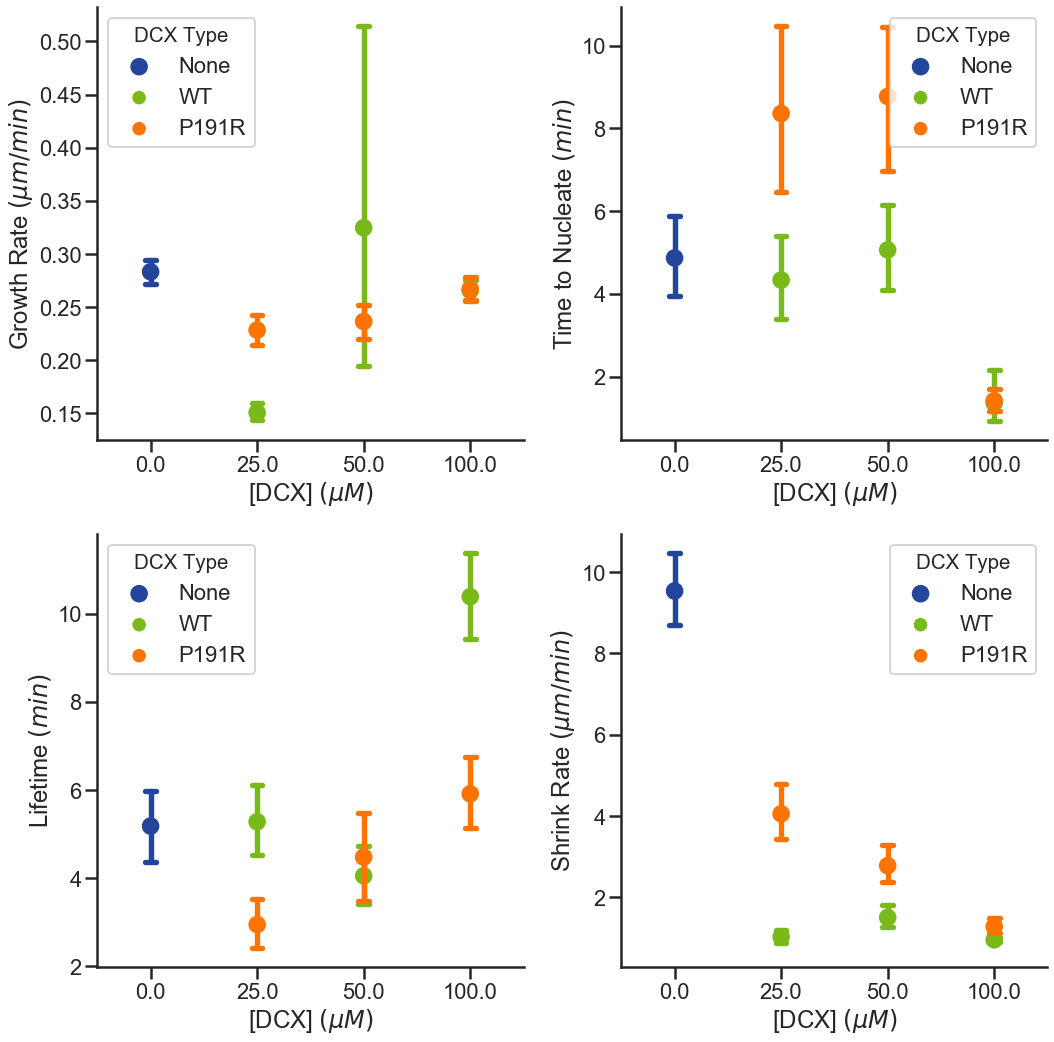

In [132]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=DCXconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('tub6uM_DCX-variable'+jointdate+'.pdf'))
plt.savefig(path/('tub6uM_DCX-variable'+jointdate+'.png'))

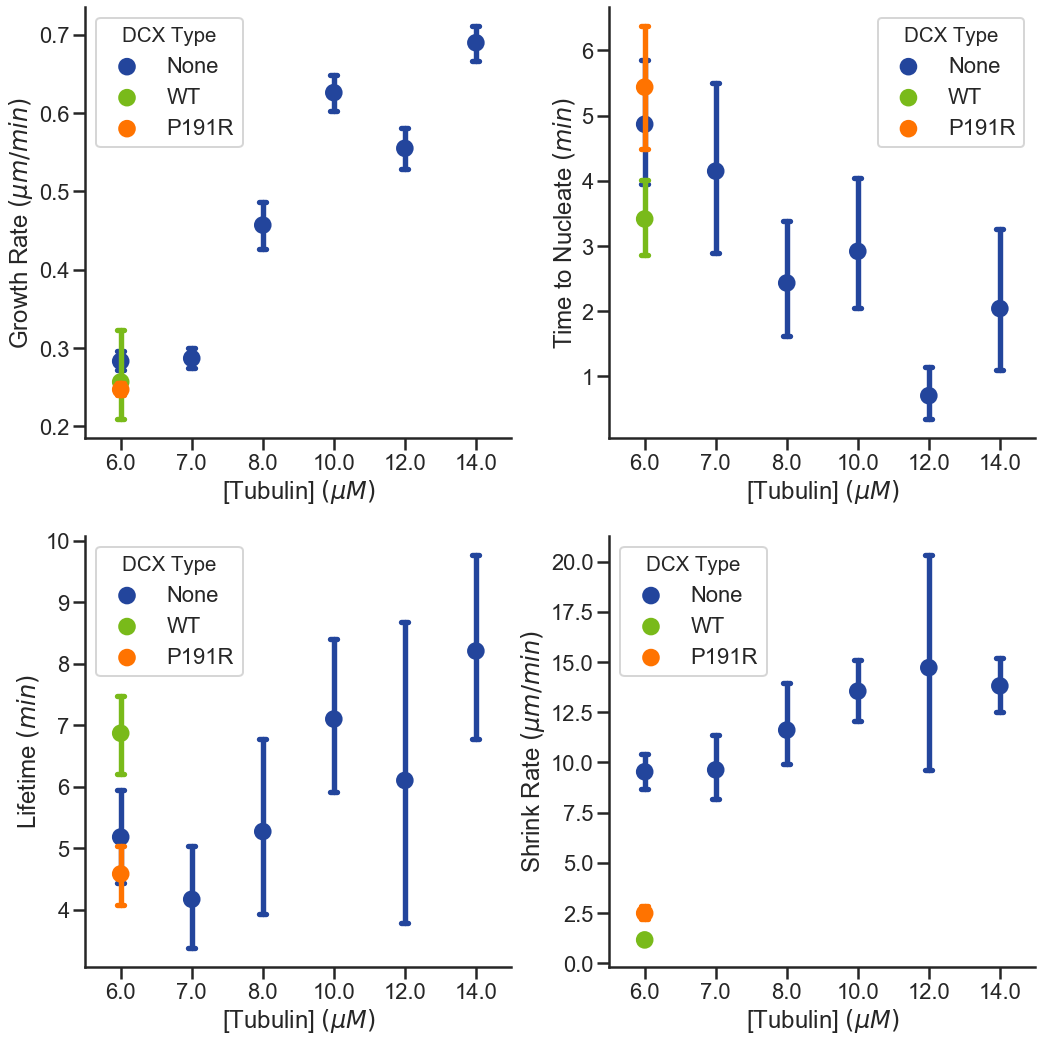

In [117]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=tubulin, y=parameters[c],
                        hue=Type, style = DCXconc , err_style="bars", marker='o', join=False, capsize=.1,
                        data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('plots'+jointdate+'.pdf'))
plt.savefig(path/('plots'+jointdate+'.png'))

# Fitting Data #

In [10]:
def make_hist(data, parameter, bins, constant) :
    fig, ax = plt.subplots(figsize=(15,15))
    sns.set_style("ticks")
    hist = data.hist(by=[Type,tubulin], column=parameter, bins = bins,density=True,ax=ax)
    fig.suptitle(parameter)
    
    sns.despine()
    sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    unique = data[DCXconc].unique()
    cte = [x if x > 0 else 0 for x in unique]
    
    return hist, cte[0],fig

In [11]:
def get_hist(ax):
    n,bins = [],[]
    for rect in ax.patches:
        
            ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
            n.append(y1-y0)
            bins.append(x0) # left edge of each bin
    
        #bins.append(x1) # also get right edge of last bin

    return n,bins


In [12]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [91]:
def equation_fit(data, parameter, equation, constant,maxbin,binsize):
    
    bins = np.arange(0, maxbin + binsize, binsize)
    hist, cte,fig = make_hist(data, parameter, bins, constant) 
    
    results = pd.DataFrame(columns=[] , index=[])
    
    for i in range(len(hist[:][0])+1):
        for j in range(len(hist[0][:])+1): 
        
            try:
                n, bins =  get_hist(hist[i][j]);
            
            except:
                continue
            
            title = []
            title = hist[i][j].get_title()
            title = title[1:-1]
            title = title.split(',')
            
            if equation == gamma :
                coeff, var_matrix = sp.optimize.curve_fit(equation,bins,n,[2,1])
            else :
                coeff, var_matrix = sp.optimize.curve_fit(equation,bins,n)

            variance = np.diagonal(var_matrix) #Refer [3]
            SE = np.sqrt(variance) #Refer [4]

        #======Making a data frame========
            results0 = pd.DataFrame(columns=[] , index=[])
            for k in np.arange(0,len(coeff)):
                header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
                r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
                results0 = pd.concat([results0, r0], axis=1, sort=False)
            
            results0[tubulin] = float(title[1])
            if title[0] == 'None':
                results0[constant] = 0
            else:
                results0[constant] = cte
            results0[Type] = title[0]
            
            results = pd.concat([results, results0], sort=False)

    return results,fig

In [38]:
newmydir = path/('fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/Sofia/Data_Sheets_summer/fitdata')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:385: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds


ValueError: `ydata` must not be empty!

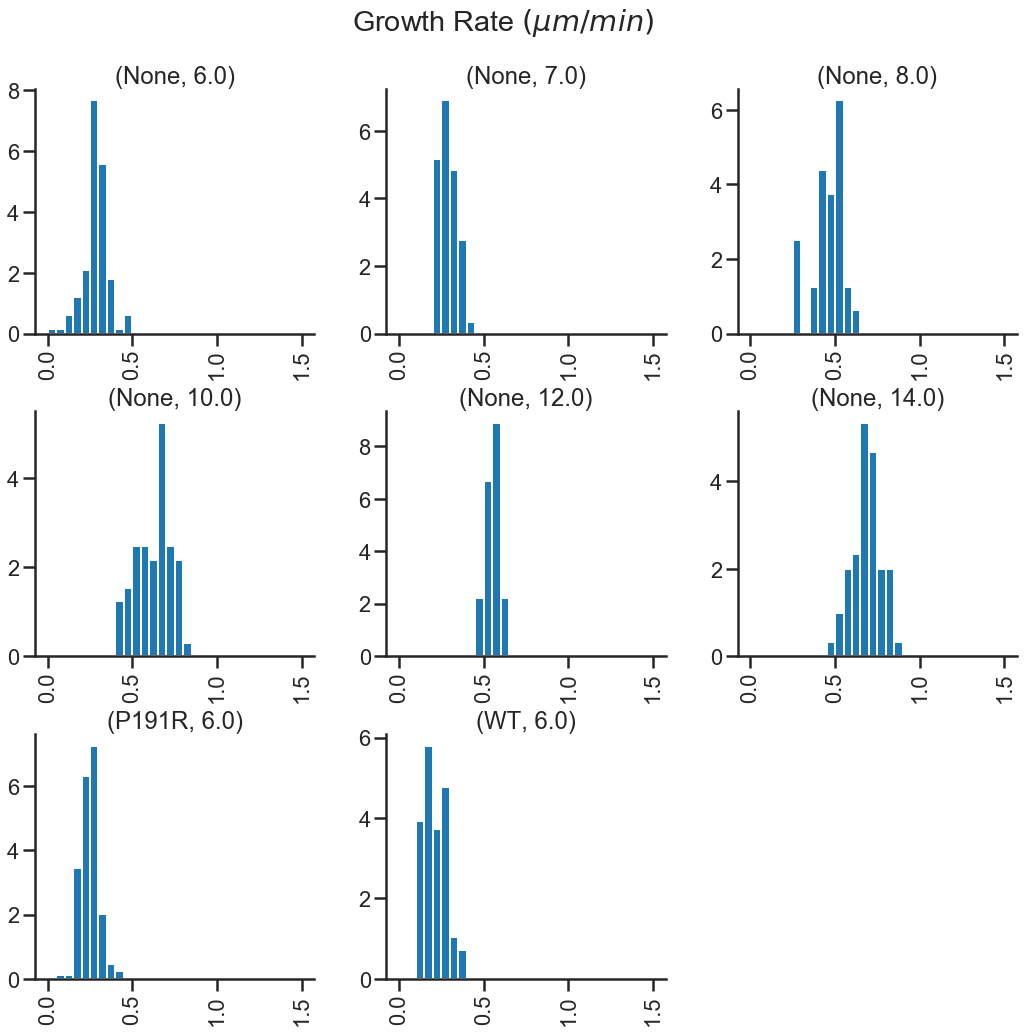

In [133]:
GrowthRateFit , GrowthRateFig = equation_fit(data,GrowthRate,gaussian,DCXconc,1.5,0.05);
GrowthRateFig.savefig(newmydir/('GrowthRateHist_'+jointdate+'.pdf'))

# TimeToNucleateFit , TimeToNucleateFig = equation_fit(data,TimeToNucleate,exponential,DCXconc,30,1);
# TimeToNucleateFig.savefig(newmydir/('TimeToNucleateHist_'+jointdate+'.pdf'))#

# LifetimeFit , LifetimeFig = equation_fit(data,Lifetime,gamma,DCXconc,30,1);
# LifetimeFig.savefig(newmydir/('LifetimeHist_'+jointdate+'.pdf'))

# ShrinkageRateFit , ShrinkageRateFig = equation_fit(data,ShrinkageRate,gaussian,DCXconc,30,0.5);
# ShrinkageRateFig.savefig(newmydir/('ShrinkageRateHist_'+jointdate+'.pdf'))


In [89]:
LifetimeCoeff0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['Value'].values
LifetimeCoeff1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['Value'].values
LifetimeSE0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['SE'].values
LifetimeSE1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = LifetimeCoeff0*LifetimeSE1 + LifetimeCoeff1*LifetimeSE0

LifetimeMeanDF = pd.DataFrame(columns=[] , index=[])
header = [np.array([Lifetime]),np.array(['Mean'])]  
for i in np.arange(0,len(LifetimeMean)):
    r0 = pd.DataFrame([LifetimeMean[i],LifetimeSE[i]], index=(['Value','SE']),columns= header)
    LifetimeMeanDF = pd.concat([LifetimeMeanDF, r0], sort=False)


In [90]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LifetimeMeanDF,ShrinkageRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+jointdate+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$  \
                    Coefficient 0 Coefficient 1                       
Value                    0.266481      0.050145                 6.0   
SE                       0.002293      0.001878                 6.0   
Value                    0.256975      0.057258                 7.0   
SE                       0.002822      0.002304                 7.0   
Value                    0.460657      0.073049                 8.0   
SE                       0.008165      0.006666                 8.0   
Value                    0.618297      0.112633                10.0   
SE                       0.011299      0.009225                10.0   
Value                    0.531607      0.042633                12.0   
SE                       0.000998      0.000847                12.0   
Value                    0.668309      0.083217                14.0   
SE                       0.004863      0.003971                14.0   

      [DCX] $(\mu M)$ DCX Type Time to Nucleate $(min)$ Lifetime $(min)$  \
                                          Coefficient 0    Coefficient 0   
Value               0     None                 4.676106         1.416276   
SE                  0     None                 0.638492         0.205823   
Value               0     None                 4.152196         1.215432   
SE                  0     None                 0.750850         0.150607   
Value               0     None                 2.551804         1.000000   
SE                  0     None                 0.194755         0.206588   
Value               0     None                 2.350290         1.229098   
SE                  0     None                 0.132198         0.204848   
Value               0     None                 1.127876         3.780332   
SE                  0     None                 0.086540         1.032597   
Value               0     None                 1.521090         1.276121   
SE                  0     None                 0.095120         0.291061   

                              Shrink Rate $(\mu m / min)$                
      Coefficient 1      Mean               Coefficient 0 Coefficient 1  
Value      3.058884  4.332223                    8.234206      4.124626  
SE         0.538891  1.392807                    0.492096      0.407037  
Value      2.849051  3.462828                    7.514100      3.467483  
SE         0.386815  0.899235                    0.529595      0.436133  
Value      3.918504  3.918505                   10.526589      2.803401  
SE         0.882793  1.692308                    0.481589      0.393217  
Value      5.451969  6.701002                   11.191344      2.772374  
SE         1.208538  2.602238                    0.268077      0.218884  
Value      1.119955  4.233802                    9.695493      4.066177  
SE         0.349284  2.476873                    1.205828      0.989134  
Value      6.974926  8.900852                   13.099848      4.646149  
SE         2.248802  4.899871                    0.682950      0.558124

#  PLOT DATA  #

In [81]:
def filter_variable(variable, filtername, filtervalue):  
    x = ResultFit[ResultFit[filtername] == filtervalue][variable].loc['Value']
    if isinstance(x, (np.ndarray)) == True :
        x = x.values
    return x

def filter_parameter(parameter, moment , filtername, filtervalue, value):  
    x = ResultFit[ResultFit[filtername] == filtervalue][parameter][moment].loc[value]
    if isinstance(x, (np.ndarray)) == True  :
        x = x.values
    return x

In [73]:
filter_parameter(Lifetime, 'Mean' , Type, 'None' , 'Value')

array([4.33222318, 3.46282816, 6.70100249, 4.23380162])

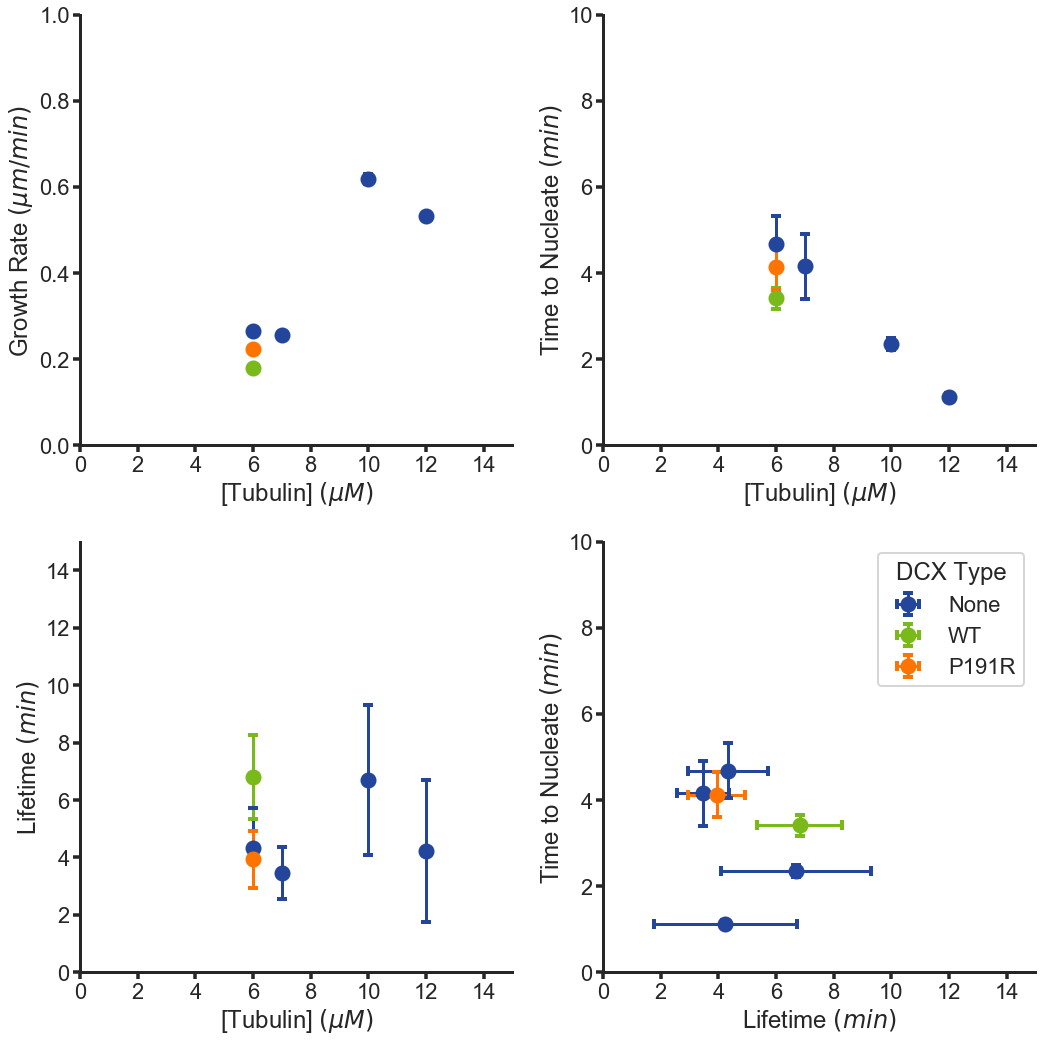

In [82]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = (GrowthRate,TimeToNucleate,Lifetime,TimeToNucleate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#     plt.suptitle('Fitted pooled data', fontsize=30)


ax[0][0].errorbar(filter_variable(tubulin, Type, 'None'), filter_parameter(GrowthRate, 'Coefficient 0' , Type, 'None' , 'Value'), 
                  yerr=filter_parameter(GrowthRate, 'Coefficient 0' , Type, 'None' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=blue)
ax[0][0].errorbar(filter_variable(tubulin, Type, 'WT'), filter_parameter(GrowthRate, 'Coefficient 0' , Type, 'WT' , 'Value'), 
                  yerr=filter_parameter(GrowthRate, 'Coefficient 0' , Type, 'WT' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=green)
ax[0][0].errorbar(filter_variable(tubulin, Type, 'P191R'), filter_parameter(GrowthRate, 'Coefficient 0' , Type, 'P191R' , 'Value'), 
                  yerr=filter_parameter(GrowthRate, 'Coefficient 0' , Type, 'P191R' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=orange)
ax[0][0].set_ylim(0,1)

ax[0][1].errorbar(filter_variable(tubulin, Type, 'None'), filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'None' , 'Value'), 
                  yerr=filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'None' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=blue)
ax[0][1].errorbar(filter_variable(tubulin, Type, 'WT'), filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'WT' , 'Value'), 
                  yerr=filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'WT' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=green)
ax[0][1].errorbar(filter_variable(tubulin, Type, 'P191R'), filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'P191R' , 'Value'), 
                  yerr=filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'P191R' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=orange)
ax[0][1].set_ylim(0,10)

ax[1][0].errorbar(filter_variable(tubulin, Type, 'None'), filter_parameter(Lifetime, 'Mean' , Type, 'None' , 'Value'), 
                  yerr=filter_parameter(Lifetime, 'Mean' , Type, 'None' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=blue)
ax[1][0].errorbar(filter_variable(tubulin, Type, 'WT'), filter_parameter(Lifetime, 'Mean' , Type, 'WT' , 'Value'), 
                  yerr=filter_parameter(Lifetime, 'Mean' , Type, 'WT' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=green)
ax[1][0].errorbar(filter_variable(tubulin, Type, 'P191R'), filter_parameter(Lifetime, 'Mean' , Type, 'P191R' , 'Value'), 
                  yerr=filter_parameter(Lifetime, 'Mean' , Type, 'P191R' , 'SE'), fmt='o', markersize=scattersize,capsize = cap,markeredgewidth=4,elinewidth=3,color=orange)
ax[1][0].set_ylim(0,15)

ax[1][1].errorbar( filter_parameter(Lifetime, 'Mean' , Type, 'None' , 'Value'), filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'None' , 'Value'),
                  xerr=filter_parameter(Lifetime, 'Mean' , Type, 'None' , 'SE'), yerr=filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'None' , 'SE'),
                  markeredgewidth=4,elinewidth=3,fmt='o', markersize=scattersize,capsize = cap,color=blue)
ax[1][1].errorbar(filter_parameter(Lifetime, 'Mean' , Type, 'WT' , 'Value'), filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'WT' , 'Value'), 
                  xerr=filter_parameter(Lifetime, 'Mean' , Type, 'WT' , 'SE'), yerr=filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'WT' , 'SE'),
                  markeredgewidth=4,elinewidth=3,fmt='o', markersize=scattersize,capsize = cap,color=green)
ax[1][1].errorbar(filter_parameter(Lifetime, 'Mean' , Type, 'P191R' , 'Value'), filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'P191R' , 'Value'), 
                  xerr=filter_parameter(Lifetime, 'Mean' , Type, 'P191R' , 'SE'), yerr=filter_parameter(TimeToNucleate, 'Coefficient 0' , Type, 'P191R' , 'SE'),
                  markeredgewidth=4,elinewidth=3,fmt='o', markersize=scattersize,capsize = cap,color=orange)
ax[1][1].set_ylim(0,10)




count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(0,15)
        ax[i][j].set_xlabel(tubulin)
        ax[i][j].set_xticks(np.arange(0, 15, 2))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[1][1].set_xlim(0,15)
ax[1][1].set_xlabel(Lifetime)
ax[1][1].set_xticks(np.arange(0, 16, 2))
ax[i][j].legend(('None','WT','P191R'),loc='upper right',title='DCX Type')

plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(path.parents[0]/('joint_graphsFit_corr_'+jointdate+'.pdf'))